<a href="https://colab.research.google.com/github/therealshai/Pytorch-notebooks/blob/main/03_pytorch_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision -art of teaching a computer to see.

Typical inputs and outputs of CV model:

INPUT: images wih 3 channels : width, height and color channels(RGB)

-> CONVERT IT INTO TENSORs

-> goes into ML model (CNN)

-> OUTPUT: predicted probabilities

OUPUT: predcited class the image belongs to


`shape= [batch_size, width, height,colour_channels]` -> **NHWC** => *colour channels last*

`shape= [batch_size,colour_channels  width, height,]` -> **NCHW** => *colour chanels first*


# What is a Convolutional Neural Network (CNN)?

+ A convolutional neural network is a specific kind of neural network with multiple layers. It processes data that has a grid-like arrangement then extracts important features.


+ CNNs use convolutions to handle the math behind the scenes. A convolution is used instead of matrix multiplication in at least one layer of the CNN

+ `Convolutions` :a *mathematical operation* performed on two functions that yields a function that is a combination of the two original functions.

  The convolution operation follows the properties of multiplication:

  1.   Commutative: `fg = gf`
  2.  Associative: `(fg)h = f(gh)`
  3. Distributive: `h(f+g) = hf + hg`


#Typical Architecture of a CNN

Hyperparameters or layer type


1.  **Input images**
2.   **Input layer**  -> takes images and preprocess it `input_shape`
3. **Convolution Layer** -> Extracts and learns the most important features from target images `torch.nn.ConvXd()`
4. **hidden activation** ->Adds non-linearity to learned features `torch.nn.ReLU()`
5.**Pooling layer** -> Reduces the dimensionality of learned image features Max:`torch.nn.MaxPool2d()` Avg: `torch.nn.AvgPool2d()`
6. **Output/linear layer** -> `torch.nn.Linear(out_features=[no_of_classes])`
7. **ouput activation** -> converts logits to predictions prob `torch.sigmoid()` or `torch.softmax()`



---


CV libraries:
`torchvision`

`torchvision.datasets`

`torchvision.models` => Transfer learning

`torchvision.transforms`

`torch.utils.data.Dataset`

`torch.utils.data.DataLoader`

---






In [ ]:
import torch
from torch import nn

In [ ]:
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision import datasets

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## 1. Get Dataset = FashionMNIST

In [ ]:
# datasets-MNIST
train_data=datasets.FashionMNIST(
    root="data", # where to download data
    train=True, # do we need training dataset
    download=True,  # do we want to download it ?
    transform=torchvision.transforms.ToTensor(),
    target_transform=None  # do we need the labels?
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)



`torchvision.transforms.ToTensor()` : coverts the image (H,W,C) in the range [0,255] to torch.floatTensor of shape (C,H,W) in the range of 0 to 1

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image , label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
train_data[0][1]

9

In [ ]:
class_index= train_data.class_to_idx
class_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets  #all labels

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check in and out shape

In [ ]:
# shapes of our image
print(f"Image shape: {image.shape}") # 1- color channels since the dataset is in grayscale
print(f"Label shape: {class_names[label]}")

Image shape: torch.Size([1, 28, 28])
Label shape: Ankle boot


### 1.2 Visualize our data

In [ ]:
image,label=train_data[0]
image.shape

torch.Size([1, 28, 28])

Invalid shape (1, 28, 28) for image data


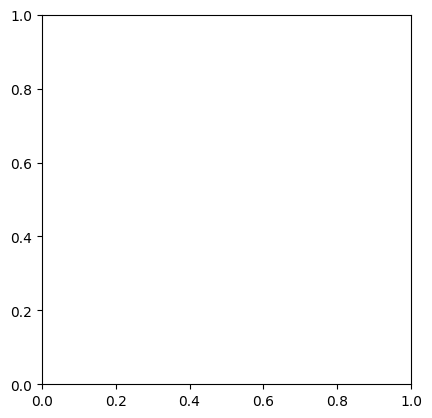

In [ ]:
try:
  plt.imshow(image) #common error: shape error
except Exception as e:
  print(e)

Text(0.5, 1.0, 'Ankle boot')

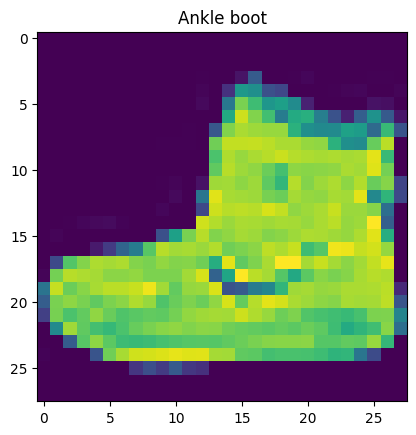

In [ ]:
plt.imshow(image.squeeze()) #removed 1 dim
plt.title(class_names[label])

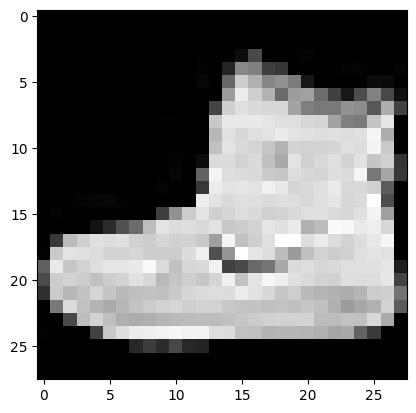

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")

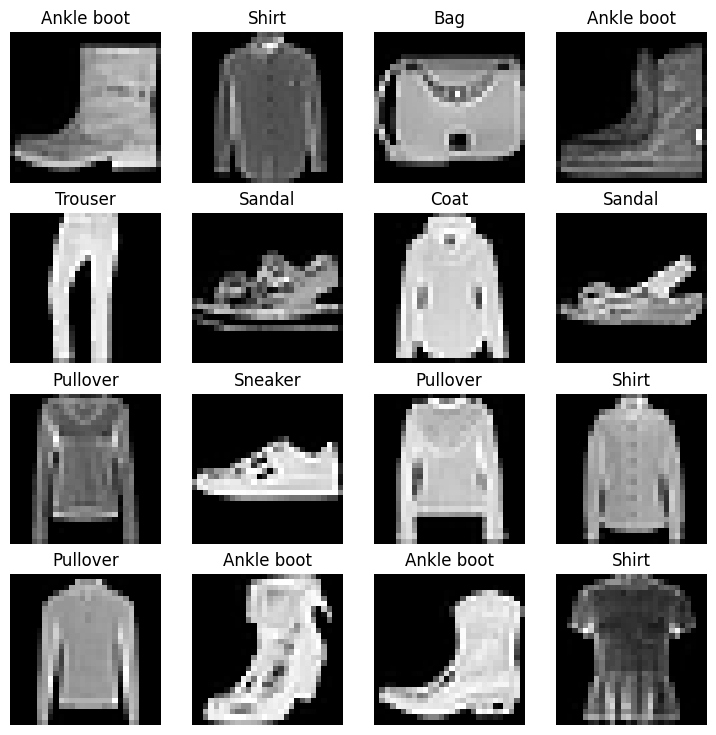

In [ ]:
#plot more images
torch.manual_seed(42)

fig=plt.figure(figsize=(9,9))
rows,cols=4,4

for i in range(1, rows*cols+1):
  random_int=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_int]

  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader
turns dataset into a python iterable + turn data into batches

`torch.utils.data.DataLoader` and `torch.utils.data.Dataset`. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset

In [ ]:
BATCH_SIZE=32

In [ ]:
from torch.utils.data import DataLoader

train_dataloader= DataLoader(train_data,batch_size=32, shuffle=True)
test_dataloader= DataLoader(test_data,batch_size=32, shuffle=False)

In [ ]:
X,y=next(iter(train_dataloader))
X.shape, y.shape # the batch images and the batch size

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
X,y=next(iter(test_dataloader))
X.shape, y.shape # the batch images and the batch size

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x79e4e32ce0d0>, <torch.utils.data.dataloader.DataLoader object at 0x79e4e31f7f50>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


`iter(train_dataloader)` creates an iterator from the train_dataloader.

`next()` gets the next item from the iterator, which in this case is a batch of images and labels. These are then unpacked into the` train_features_batch `and `train_labels_batch` variables.

So, `train_features_batch` will contain a batch of `images`, and `train_labels_batch `will contain the corresponding `labels` for those images.

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


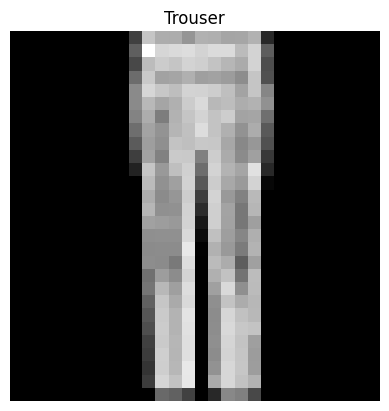

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3.Model

In [ ]:
#baseline model -Linear
flatten_model=nn.Flatten() #

# single sample
x= train_features_batch[0]
x.shape # -> color_channels, height, width

#flatten the sample
output=flatten_model(x) #-> color_channels, height* width
print(f"Shape before flatten:{x.shape} after {output.shape}")

Shape before flatten:torch.Size([1, 28, 28]) after torch.Size([1, 784])


In [ ]:
output.shape

torch.Size([1, 784])

In [ ]:
from torch import nn

In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
              input_shape:int,
              hidden_units:int,
              output_shape:int):
    super().__init__()
    self.layer_stack= nn.Sequential(
              nn.Flatten(),
              nn.Linear(in_features=input_shape,out_features=hidden_units),
              nn.Linear(in_features=hidden_units,out_features=output_shape))

  def forward(self,x):
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)

model_0=FashionMNISTModelV0(
    input_shape=784, #width*height
    hidden_units=10,
    output_shape=len(class_names)
    )

## 4. Setup Lose fucntion, Optimizer
`nn.CrossEntropyLoss()` -loss
`torch.optim.SGD()` - Optimizer
``

In [ ]:
import requests
from pathlib import Path # Import Path

#donwload helper fucntions
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")

  # Assuming the intention was to download the file, I'll add a basic download logic here.
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists


In [ ]:
#IMPORT ACC METRIC
from helper_functions import accuracy_fn

#loss function and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device: torch.device =None):
  total_time= round(end-start,3)
  print(f"Train time on {device}: {total_time} seconds")
  return total_time

## 5.Training Loop
- loop through batches
- loop through training batches -> perform training steps and calculate train loss per batch
- loop through testing batches -> perform testung steps and calculate test loss per batch


`enumerate()` function adds a counter to each item in a list or other iterable. It turns the iterable into something we can loop through, where each item comes with its number (starting from 0 by default)

In [ ]:
#import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)

EPOCH=2000
for epoch in tqdm(range(EPOCH)): #wrap the tqdm over the iterator


  #TRAINING
  train_loss=0
  train_acc=0

  #add a loop through the training batche
  for batch,(X,y) in enumerate(train_dataloader):
    """ When we iter over data_loader- batches of imagases and each batch -> each
    batch then can be destrcuted into X,y which are images and labels of the
    return of train_dataloader
    """
    print(f"EPOCH:{epoch:}----")
    model_0.train()
    y_pred = model_0(X)

    loss=loss_fn(y_pred,y)

    #calculate loss per batch
    loss =loss_fn(y_pred,y)
    train_loss+=loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch% 400 ==0:
      print(f"epoch:{epoch} batch num :{batch *len(X)/len(train_dataloader.dataset)} samples")

    #avg of train_loss
    train_loss = train_loss/len(train_dataloader)

    train_acc = accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #testing

    test_loss,test_Acc=0,0
    model_0.eval()
    with torch.inference_mode():
      for X_test,y_test in test_dataloader:
            test_pred = model_0(X_test)

            test_loss += loss_fn(test_pred,y_test)

            test_Acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
        #since test_pred is a logit we need argmax

    test_loss =test_loss/len(test_dataloader)

    print(f"Test loss{test_loss}")

  0%|          | 0/2000 [00:00<?, ?it/s]

EPOCH:0----
epoch:0 batch num :0.0 samples
Test loss0.8788195848464966
Test loss0.8893817663192749
Test loss0.866127073764801
Test loss0.8747624754905701
Test loss0.8543978333473206
Test loss0.8601341247558594
Test loss0.8381062746047974
Test loss0.890424907207489
Test loss0.8480677008628845
Test loss0.8373767137527466
Test loss0.8275490403175354
Test loss0.9069671034812927
Test loss0.8182759881019592
Test loss0.8242014646530151
Test loss0.8697435855865479
Test loss0.8635066747665405
Test loss0.8143215775489807
Test loss0.8122444748878479
Test loss0.834301233291626
Test loss0.8688693642616272
Test loss0.8490478992462158
Test loss0.8186073899269104
Test loss0.8209689855575562
Test loss0.8433095216751099
Test loss0.8588270545005798
Test loss0.8664109110832214
Test loss0.7919945120811462
Test loss0.8068696856498718
Test loss0.804103672504425
Test loss0.8298726677894592
Test loss0.886734664440155
Test loss0.8929861783981323
Test loss0.8172101378440857
Test loss0.7758516073226929
Test loss0

KeyboardInterrupt: 